### Nadillia Sahputra (2070770)
### LAB 6

In [1]:
library(ggplot2)
library(coda)
library(tibble)
library(rjags)
library(runjags)
# library(tidybayes)
library(dplyr)
library(ISOweek)
library(lubridate)
library(rjson)
library(XML)

Warning message:
“package ‘coda’ was built under R version 4.2.1”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘rjags’ was built under R version 4.2.3”
Linked to JAGS 4.3.0

Loaded modules: basemod,bugs


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




1. Given the following un-normalized posterior distribution:

$g(\theta \mid x) \propto \frac{1}{2} \exp -\frac{(\theta+3)^2}{2}+\frac{1}{2} \exp -\frac{(\theta-3)^2}{2}$

- draw a Markov Chain from the posterior distribution using a Metropolis-Hastings algorithm. 
- use a Norm (0, 1) as random-walk candidate density
- plot the sampled distribution
- analyze the chain with the CODA package and plot the chain autocorrelation

In [2]:
#Target function
g <- function(theta) {
    return(0.5 * exp(-0.5*(theta+3)^2) + 0.5 * exp(-0.5*(theta-3)^2))
}

In [3]:
# Metropolis algorithm
metropolis.1dim <- function(func , theta.init , n.sample , sigma) {
    theta.cur <- theta.init
    func.Cur <- func(theta.cur)
    func.Samp <- matrix(data=NA , nrow=n.sample , ncol=2)
    n.accept <- 0
    rate.accept <- 0.0
    for (n in 1:n.sample) {
        theta.prop <- rnorm(n=1, mean = theta.cur, sigma)
        func.Prop <- func(theta.prop)
        MR <- func.Prop / func.Cur 
        
        if (MR >= 1 || MR > runif(1) ) {
            theta.cur <- theta.prop
            func.Cur <- func.Prop
            n.accept <- n.accept + 1
        }
        func.Samp[n, 1] <- func.Cur
        func.Samp[n, 2] <- theta.cur
    }
    return(func.Samp)
}


In [4]:
g.metropolis <- function(theta) {
    return((g(theta )))
}

# Parameters
theta.mean <- 0
sample.sig <- 1
n.sample <- 10^5

# Running the chain
set.seed(201070770)
chain <- metropolis.1dim(func=g.metropolis ,
    theta.init = theta.mean ,
    n.sample = n.sample ,
    sigma = sample.sig^2)


In [5]:
h <- hist(chain[,2], plot=FALSE)
h

$breaks
 [1] -8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8

$counts
 [1]     2    45  1082  6859 16661 17208  6814  1122  1236  7004 17161 17118
[13]  6679   914    92     3

$density
 [1] 0.00002 0.00045 0.01082 0.06859 0.16661 0.17208 0.06814 0.01122 0.01236
[10] 0.07004 0.17161 0.17118 0.06679 0.00914 0.00092 0.00003

$mids
 [1] -7.5 -6.5 -5.5 -4.5 -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5  4.5  5.5  6.5
[16]  7.5

$xname
[1] "chain[, 2]"

$equidist
[1] TRUE

attr(,"class")
[1] "histogram"

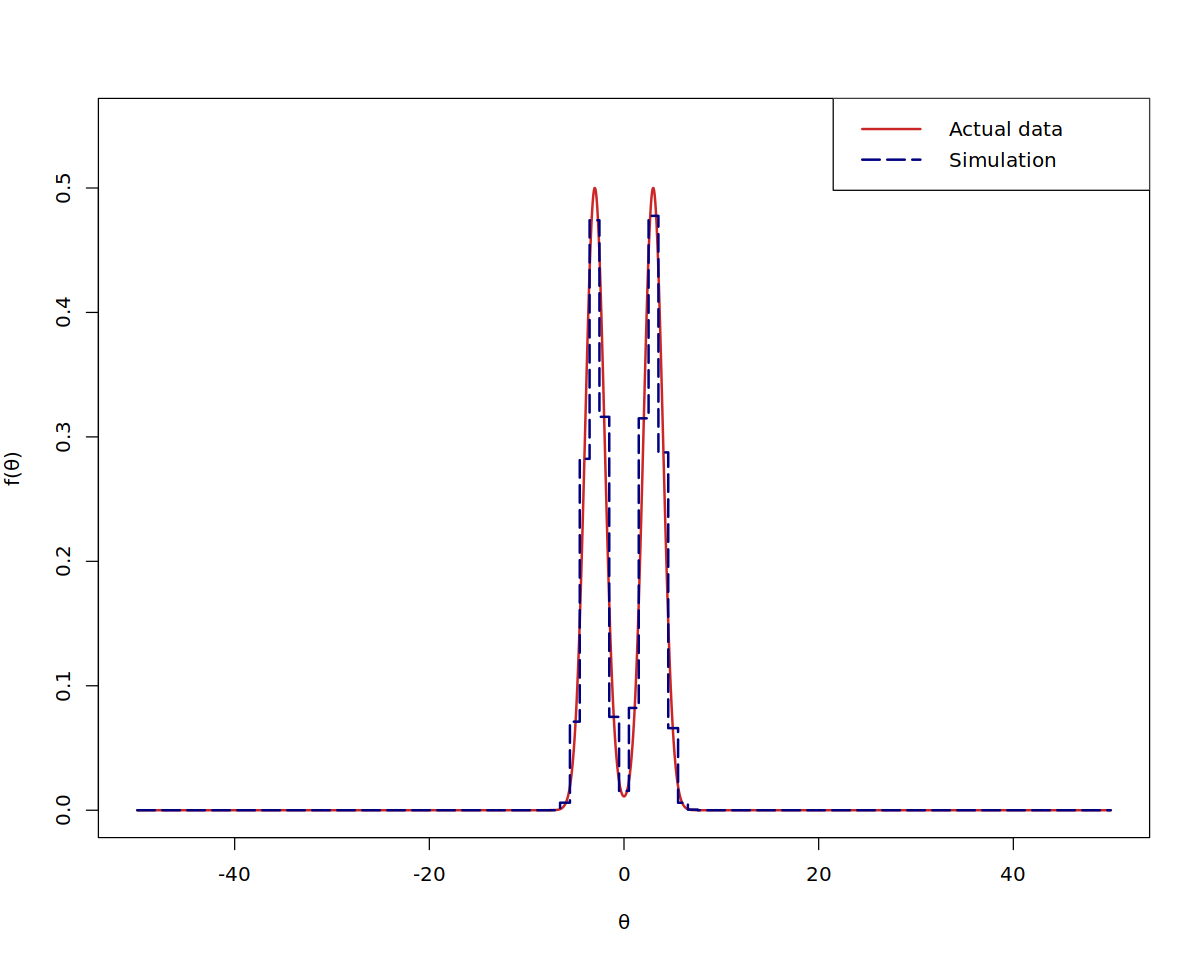

In [6]:
#Plotting
options(repr.plot.width=10, repr.plot.height=8)

x <- seq(-50, 50, length.out=10^4)
y <- g(x)
ymax <- 1.05 * max(y)

plot(x, y, ylim=c(0,max(y)*1.10), type='l', lwd=2, 
     col='firebrick3', xlab=expression(theta), 
     ylab=expression(paste('f(',theta ,')', sep='')))

sa <- which(chain[,2]>=min(x) & chain[,2]<=max(x))
hist <- hist(chain[sa,2], breaks=seq(from=min(x), to=max(x),length.out=100), plot=FALSE)
Zhist <- sum(hist$counts )*diff(range(hist$breaks ))/( length(hist$counts ))
lines(hist$breaks , c(hist$counts*2.5/Zhist ,0),
col='navy', type="s", lwd=2, lty=5)

# Add legend
legend("topright", 
       legend = c("Actual data", "Simulation"), 
       col = c("firebrick3", "navy"), 
       lty = c(1, 5), 
       lwd = c(2, 2))



Iterations = 1:1e+05
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 1e+05 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
      0.005536       3.149706       0.009960       0.167671 

2. Quantiles for each variable:

   2.5%     25%     50%     75%   97.5% 
-4.6592 -2.9813  0.3756  2.9911  4.6188 


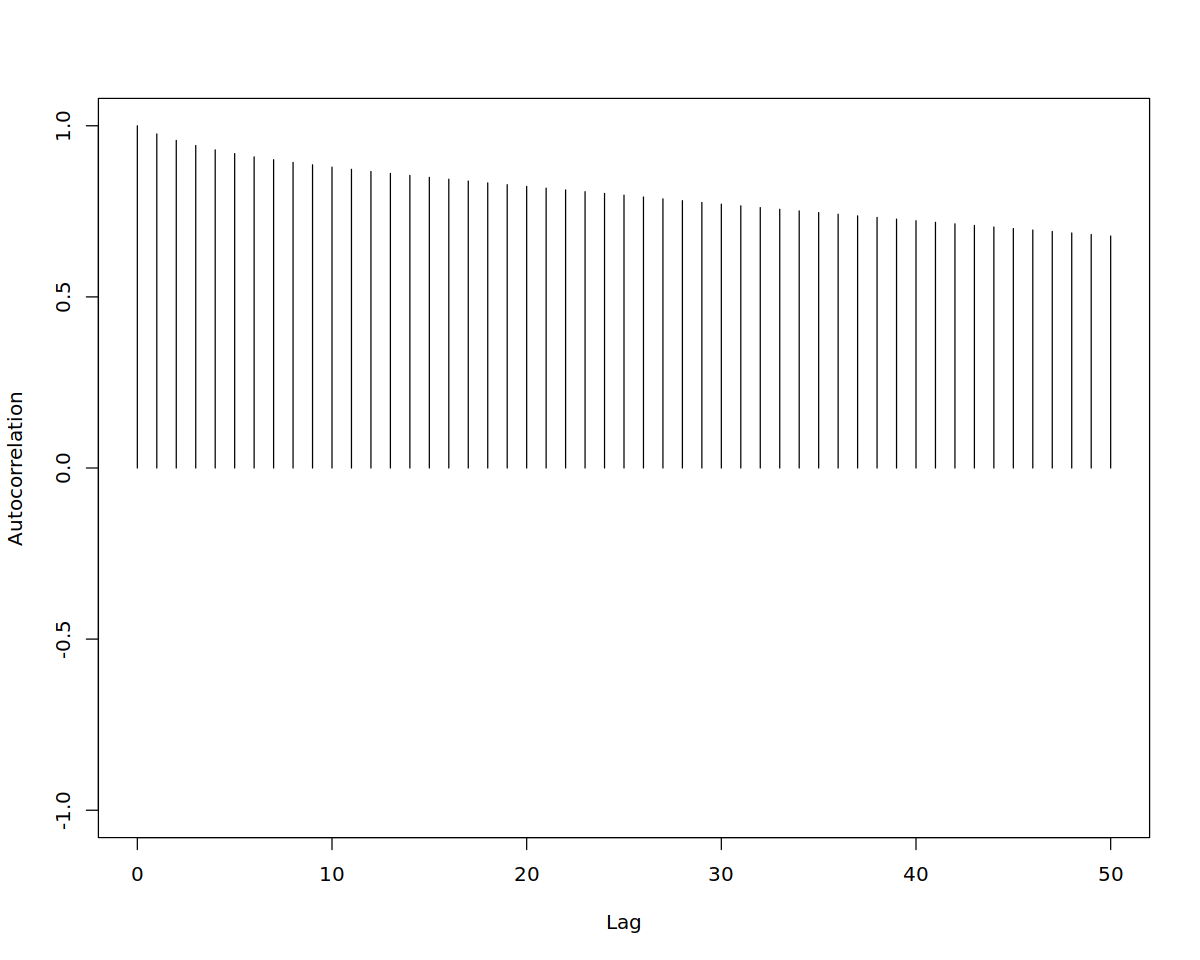

In [7]:
coda <- mcmc(chain[,2])
summary(coda)
autocorr.plot(coda)


Iterations = 1:1e+05
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 1e+05 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
      0.005536       3.149706       0.009960       0.167671 

2. Quantiles for each variable:

   2.5%     25%     50%     75%   97.5% 
-4.6592 -2.9813  0.3756  2.9911  4.6188 


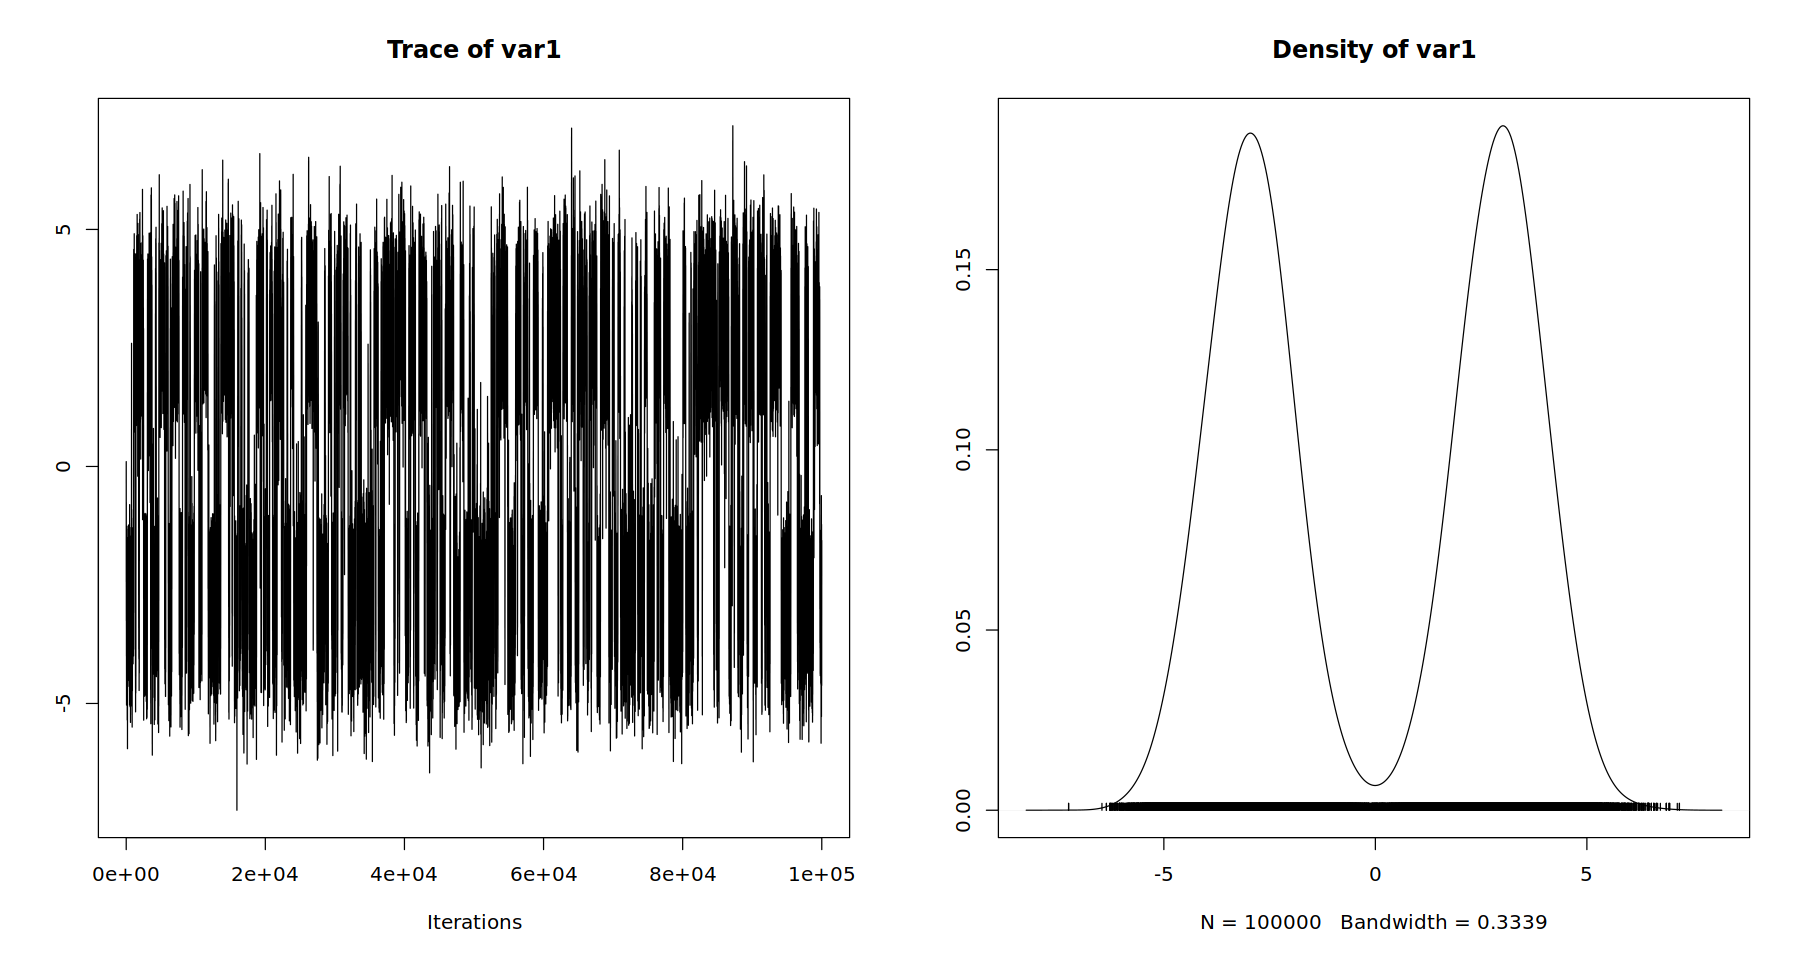

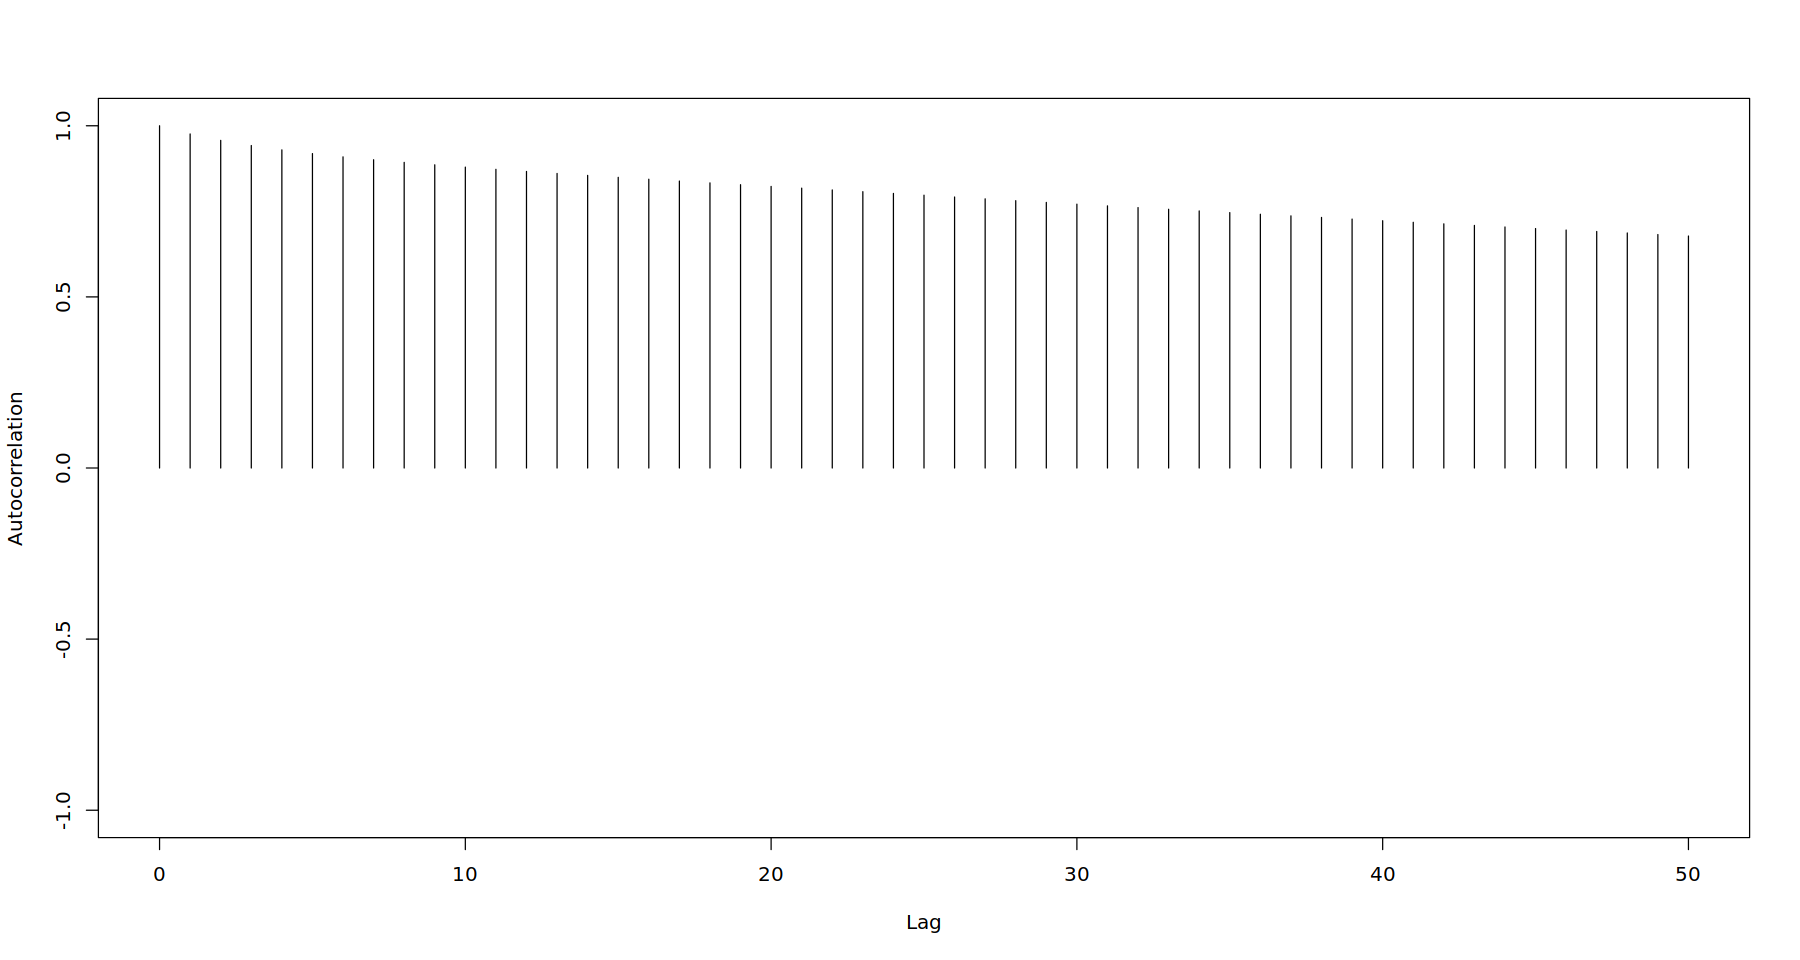

In [8]:
# Converting to CODA 
coda <- mcmc(chain[,2])
summary(coda)

options(repr.plot.width=15, repr.plot.height=8)
plot(coda)
# Autocorrelation plot
autocorr.plot(coda)

2. the European Medicines Agency (EMA) has authorized a list of COVID-19 vaccines, after having
performed a scientific evaluation of the veccines efficacy
The following vaccines are currently authorized for use in the European Union:
- Comirnaty (BioNTech and Pfizer)
- VCOVID-19 Vaccine Valneva
- Nuvaxovid (Novavax)
- Pikevax (Moderna)
- Vaxzeviria (AstraZeneca)
- Jcovden (Janssen)
- VidPrevtyn Beta (Sanofi Pasteur)
- Bimervax, previously COVID-19 Vacxcine HIPRA (HIPRA Human Health S.L.U.)

• analyze the initial test data reported on the EMA Web site for the following early Vaccines
- Janssen [1]
- Moderna [2]
- AstraZeneca [3]
- Jcovden [4]
and create a Markow Chain Monte Carlo JAGS or stan the efficacy of each Vaccine. Infere the 95%
credibility interval.

Because Janssen and Jcovden is the same, to mantain same workload, analysist is done on Comimaty (BioNTech and Pfizer)[5].

In [9]:
# Make a function to compute efficacy
efficacy <- function (x){
    num_vaccine <- x[1]
    num_placebo <- x[2]
    sick_vaccine <- x[3]
    sick_placebo <- x[4]
    
    # Make the status of patients
    substance <- c(rep(("Vaccine"), num_vaccine), rep(("Placebo"), num_placebo))
    patient_stat <- c(rep("Pos", sick_vaccine),
                        rep("Neg", num_vaccine - sick_vaccine),
                        rep("Pos", sick_placebo),
                        rep("Neg", num_placebo - sick_placebo ))
    vacc.tb <- tibble(patient_stat=patient_stat , substance=substance)
    table(vacc.tb[[2]], vacc.tb[[1]])
    
    # Data list for the Jags
    dataList = list(
    tested = ifelse(vacc.tb$patient_stat == "Neg", 0, 1),
    patient = as.integer(factor(vacc.tb$substance)),
    Ntot = nrow(vacc.tb),
    Nclass = nlevels(factor(vacc.tb$substance))
    )
    
    # Model for Jags
    modelString <- "
    model {
    for ( i in 1:Ntot ) {
    tested[i] ~ dbern( theta[patient[i]] )
    }
    for ( k in 1:Nclass ) {
    theta[k] ~ dbeta(4 , 96)
    }
    }"


    # Intialization to avoid intial correlations
    init <- list(
      list(theta = rep(0.1, dataList$Nclass), .RNG.name = "base::Super-Duper", .RNG.seed = 15),
      list(theta = rep(0.6, dataList$Nclass), .RNG.name = "base::Super-Duper", .RNG.seed = 24),
      list(theta = rep(0.7, dataList$Nclass), .RNG.name = "base::Super-Duper", .RNG.seed = 35),
      list(theta = rep(0.8, dataList$Nclass), .RNG.name = "base::Super-Duper", .RNG.seed = 65)
    )
    
    # Running the chains
    chains <- run.jags(modelString , sample = 5000, n.chains = 4, method = "parallel",
                              monitor = "theta", data = dataList, inits = init, 
                              silent.jags = TRUE)
    
    substance_effect <- tidybayes::tidy_draws(chains) %>%
                                select('theta[1]':'theta[2]') %>%
                                rename(Placebo = 'theta[1]', Vaccine = 'theta[2]') %>%
                                mutate(diff_rate = (Placebo - Vaccine) / Placebo * 100,
                                Placebo_perc = Placebo * 100,
                                Vaccine_perc = Vaccine * 100)

    mcmc <- as.mcmc(substance_effect , vars="diff_rate")
    mcmcdf <- as.data.frame(mcmc)
    return(mcmcdf)
}



In [10]:
# DataFrame of 4 covid vaccines 
covid_vaccines <- data.frame(
    Category = c("Num_Vaccine", "Num_Placebo", "Positive_Vaccine", "Positive_Placebo"),
    Jansen = c(19630, 19691, 116, 348),
    Spikevax = c(14134, 14073, 11, 185),
    Vaxzeria = c(5258, 5210, 64, 154),
    Comirnaty = c(18198, 18325, 8, 162)
)
covid_vaccines

Category,Jansen,Spikevax,Vaxzeria,Comirnaty
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Num_Vaccine,19630,14134,5258,18198
Num_Placebo,19691,14073,5210,18325
Positive_Vaccine,116,11,64,8
Positive_Placebo,348,185,154,162


In [11]:
# Applying efficacy function to all the data in covid vaccines data frame
results <- lapply(covid_vaccines[-1], efficacy)

Calling 4 simulations using the parallel method...
All chains have finished
Simulation complete.  Reading coda files...
Coda files loaded successfully
Finished running the simulation
Calling 4 simulations using the parallel method...
All chains have finished
Simulation complete.  Reading coda files...
Coda files loaded successfully
Finished running the simulation
Calling 4 simulations using the parallel method...
All chains have finished
Simulation complete.  Reading coda files...
Coda files loaded successfully
Finished running the simulation
Calling 4 simulations using the parallel method...
All chains have finished
Simulation complete.  Reading coda files...
Coda files loaded successfully
Finished running the simulation


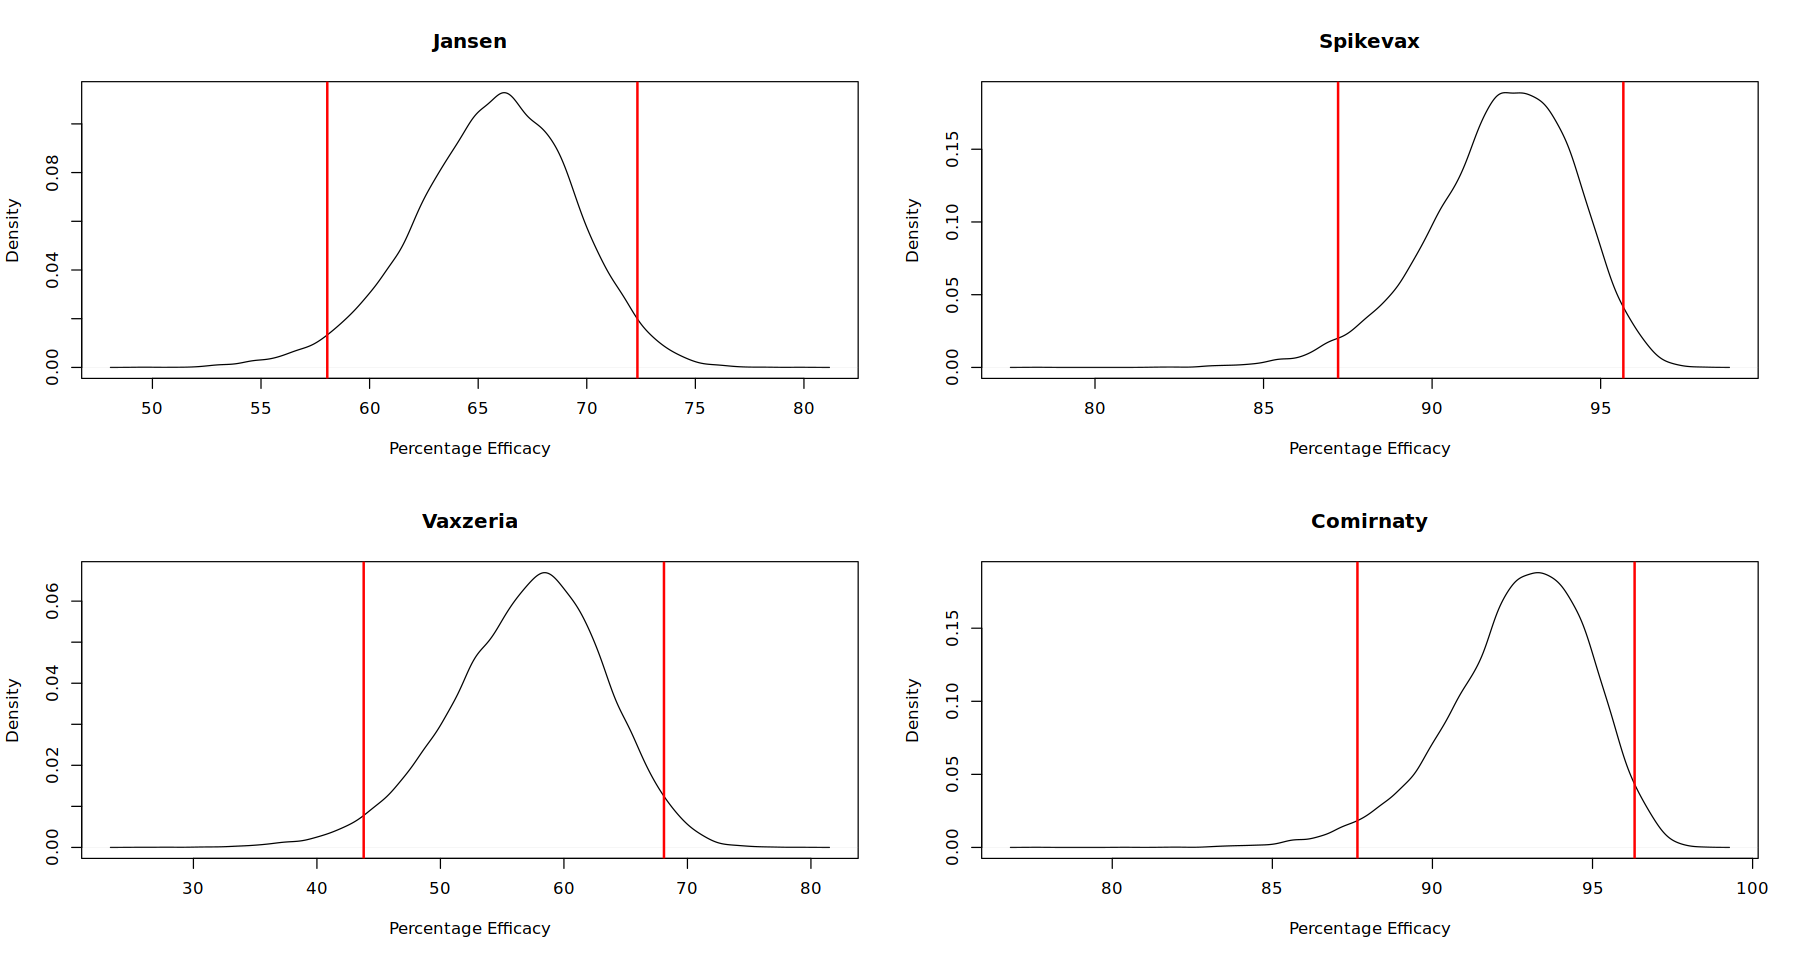

In [12]:
# Plotting the results
par(mfrow = c(2, 2))
name = names(covid_vaccines)[-1]
for(i in 1:length(results)) {
    h <- hist(results[[i]]$diff_rate , nc=100, plot = FALSE)
    d <- density(results[[i]]$diff_rate)
    # Plot the density and the 95% credibility interval
    plot(d, main = name[i], xlab = "Percentage Efficacy")
    cred <- quantile(results[[i]]$diff_rate, c(0.025, 0.975))
    abline(v =cred, col = "red", lwd = 2)
}

3. According to the official COVID-19 vaccination data, 70% of the world population has received at least one dose of a COVID-19 vaccine. A global vaccination dataset is available [6] . The European Centre for Disease Prevention and Control published a downloadable file [7] containing information on COVID-19 vaccination in the EU/EEA.
- analyze the data and produce the following plots:
    - number of vaccinated people (cumulative, daily and week average)
    - number of confirmed deaths by COVID-19, both cumulative and weekly average

In [13]:
# Read the covid data csv into a dataframe 
covid_data <- read.csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data-old.csv")

In [14]:
head(covid_data,3)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,⋯,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AFG,Asia,Afghanistan,2020-02-24,5,5,NA,NA,NA,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
2,AFG,Asia,Afghanistan,2020-02-25,5,0,NA,NA,NA,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA
3,AFG,Asia,Afghanistan,2020-02-26,5,0,NA,NA,NA,NA,⋯,NA,37.746,0.5,64.83,0.511,41128772,NA,NA,NA,NA


In [15]:
# create a new data frame wor total vaccinations per day and cummulative daily
covid_d <- covid_data %>%
  group_by(date) %>%
  summarise(total_vaccinated = sum(people_vaccinated_per_hundred, na.rm = TRUE)) %>%
  mutate(cumulative_vaccinated = cumsum(total_vaccinated))
covid_d$date <- as.Date(covid_d$date)

Warning message:
“Transformation introduced infinite values in continuous y-axis”


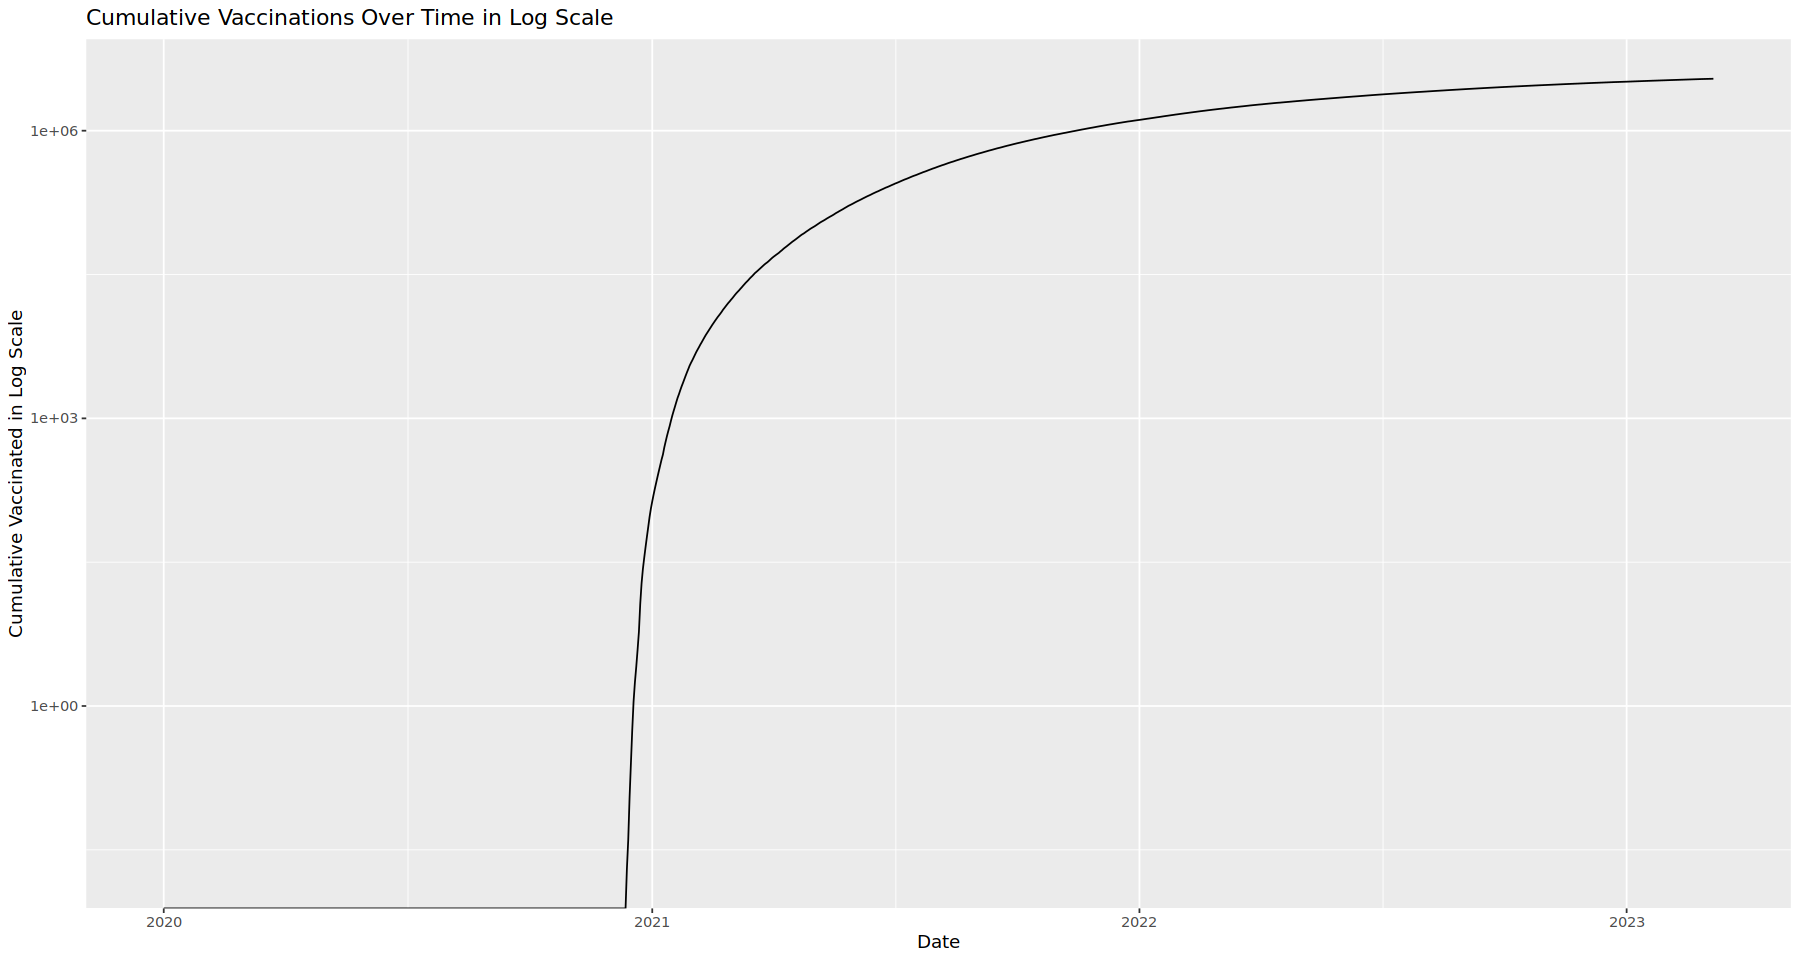

In [16]:
ggplot(covid_d, aes(x = date, y = cumulative_vaccinated)) +
  geom_line() +
  scale_y_log10() + # Log scale  to simplify interpretation of the graph 
  labs(x = "Date", 
       y = "Cumulative Vaccinated in Log Scale", 
       title = "Cumulative Vaccinations Over Time in Log Scale")

Warning message:
“Transformation introduced infinite values in continuous y-axis”


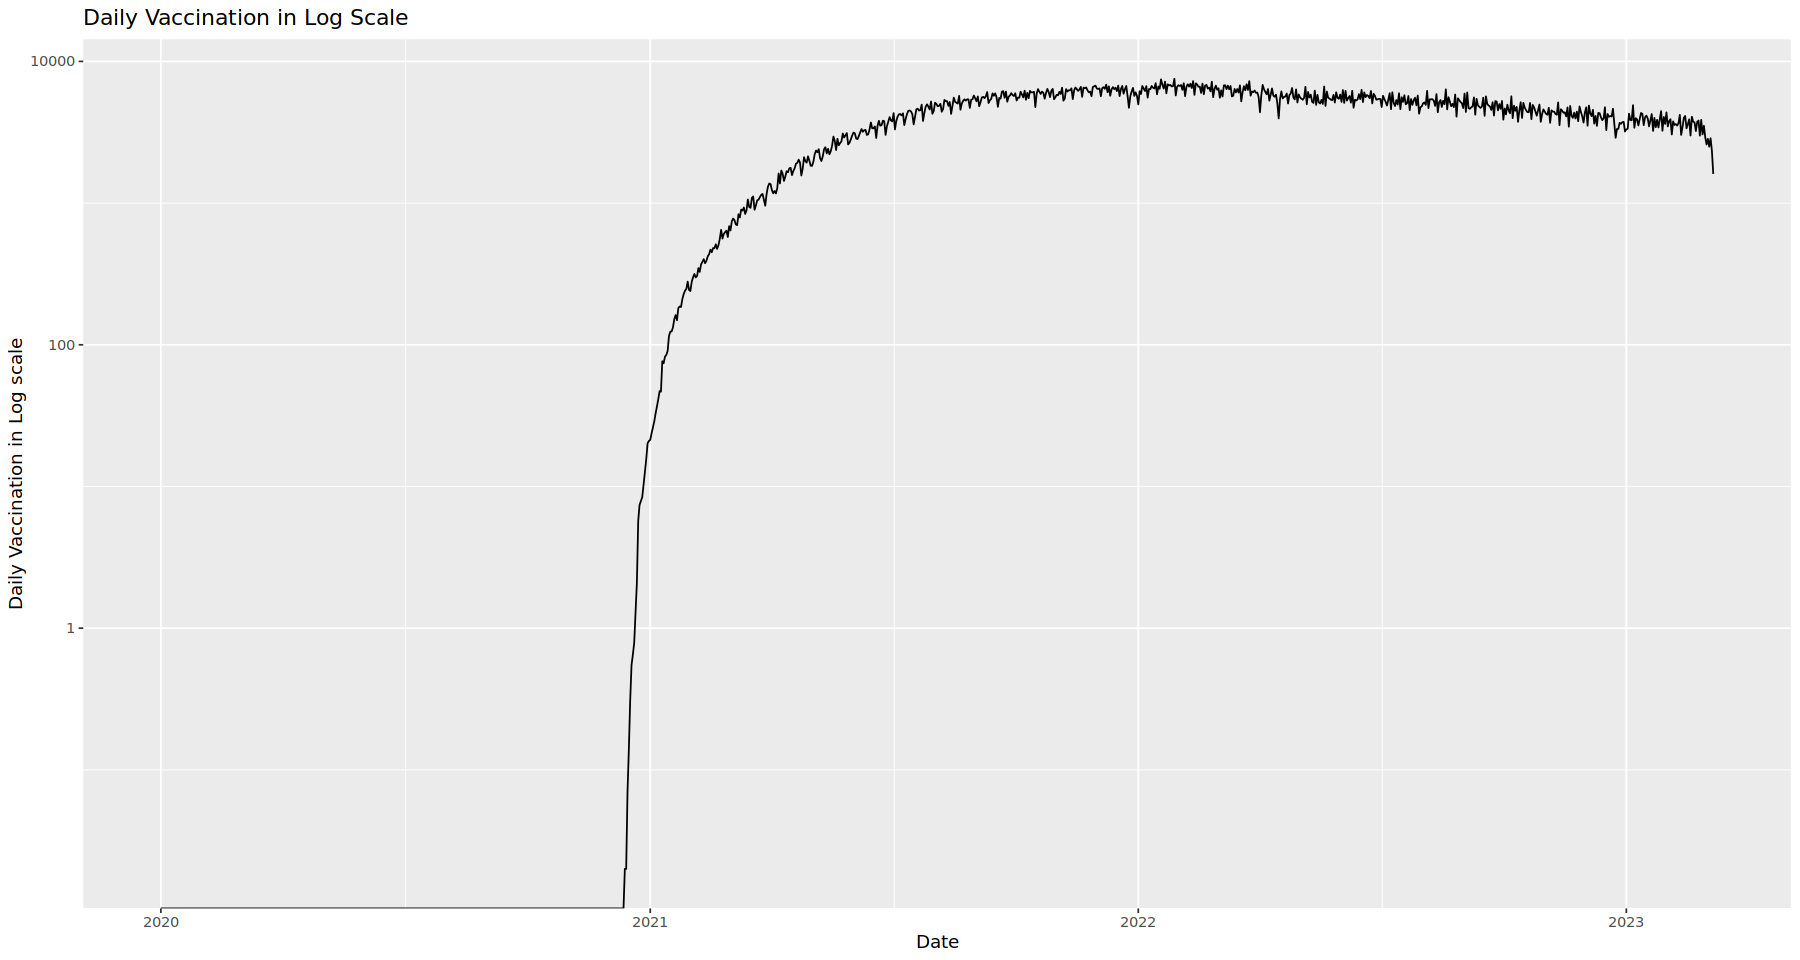

In [17]:
ggplot(covid_d, aes(x = date, y = total_vaccinated)) +
  geom_line() +
  scale_y_log10() +
  labs(x = "Date", 
       y = "Daily Vaccination in Log scale", 
       title = "Daily Vaccination in Log Scale")

In [18]:
covid_d$week <- floor_date(covid_d$date, "week")

# Calculate the weekly average of vaccinations
covid_weekly <- covid_d %>%
  group_by(week) %>%
  summarise(weekly_average = mean(total_vaccinated, na.rm = TRUE))

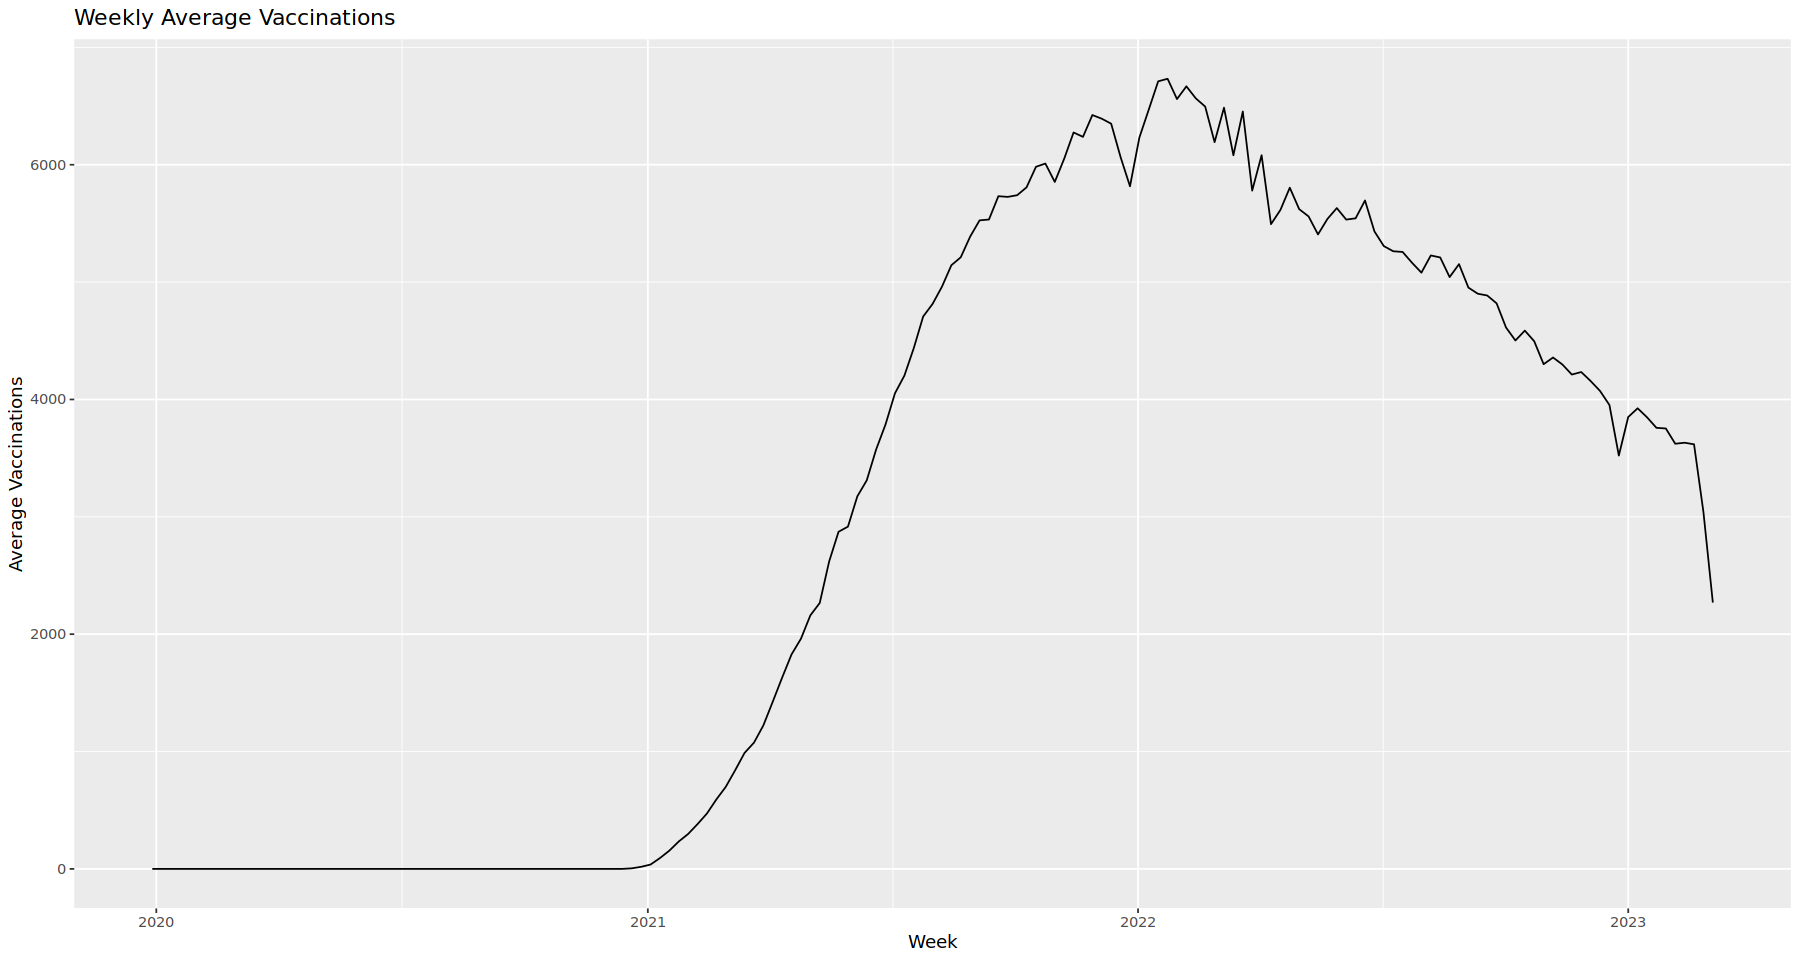

In [19]:
# Create the plot
ggplot(covid_weekly, aes(x = week, y = weekly_average)) +
  geom_line() +
  labs(title = "Weekly Average Vaccinations",
       x = "Week",
       y = "Average Vaccinations")

The Covid Vaccination with data from  The European Centre for Disease Prevention and Control [8] only available per weekly basis. Hence, the only plot presented is the weekly average. For the cumulative and daily data will be from OWID vaccination dataset. 

In [20]:
# Read the covid data csv from The European Centre for Disease Prevention and Control
data <- read.csv("data.csv")

In [21]:
# Sort the date from oldest to newest data 
covid_eu <- data%>%
  arrange(YearWeekISO)

# Convert YearWeekISO to a regular date with ISOweek packages
covid_eu$Date <- ISOweek2date(paste0(covid_eu$YearWeekISO, "-1"))

In [22]:
head(covid_eu)

,YearWeekISO,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,DoseAdditional4,DoseAdditional5,UnknownDose,Region,TargetGroup,Vaccine,Population,Date
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<date>
1,2020-W50,DK,4687050,0,0,2,NA,0,0,0,0,0,0,0,DK,ALL,COM,5822763,2020-12-07
2,2020-W50,DK,300624,0,0,0,NA,0,0,0,0,0,0,0,DK,HCW,COM,5822763,2020-12-07
3,2020-W50,DK,42048,0,0,0,NA,0,0,0,0,0,0,0,DK,LTCF,COM,5822763,2020-12-07
4,2020-W50,DK,1848339,0,0,2,NA,0,0,0,0,0,0,0,DK,Age25_49,COM,5822763,2020-12-07
5,2020-W51,DK,1848339,0,0,6,NA,0,0,0,0,0,0,0,DK,Age25_49,COM,5822763,2020-12-14
6,2020-W51,DK,801166,0,0,1,NA,0,0,0,0,0,0,0,DK,Age50_59,COM,5822763,2020-12-14


In [23]:
# Create a new dataframe with groupby date and having the total amount of vaccinated people for that date
cov_weekly <- covid_eu %>%
  group_by(Date) %>%
  summarise(weekly_avg = mean(FirstDose))

In [24]:
head(cov_weekly)

Date,weekly_avg
<date>,<dbl>
2020-12-07,1.000000
2020-12-14,2.666667
2020-12-21,33.728814
2020-12-28,405.212424
2021-01-04,1233.388346
2021-01-11,1793.516267


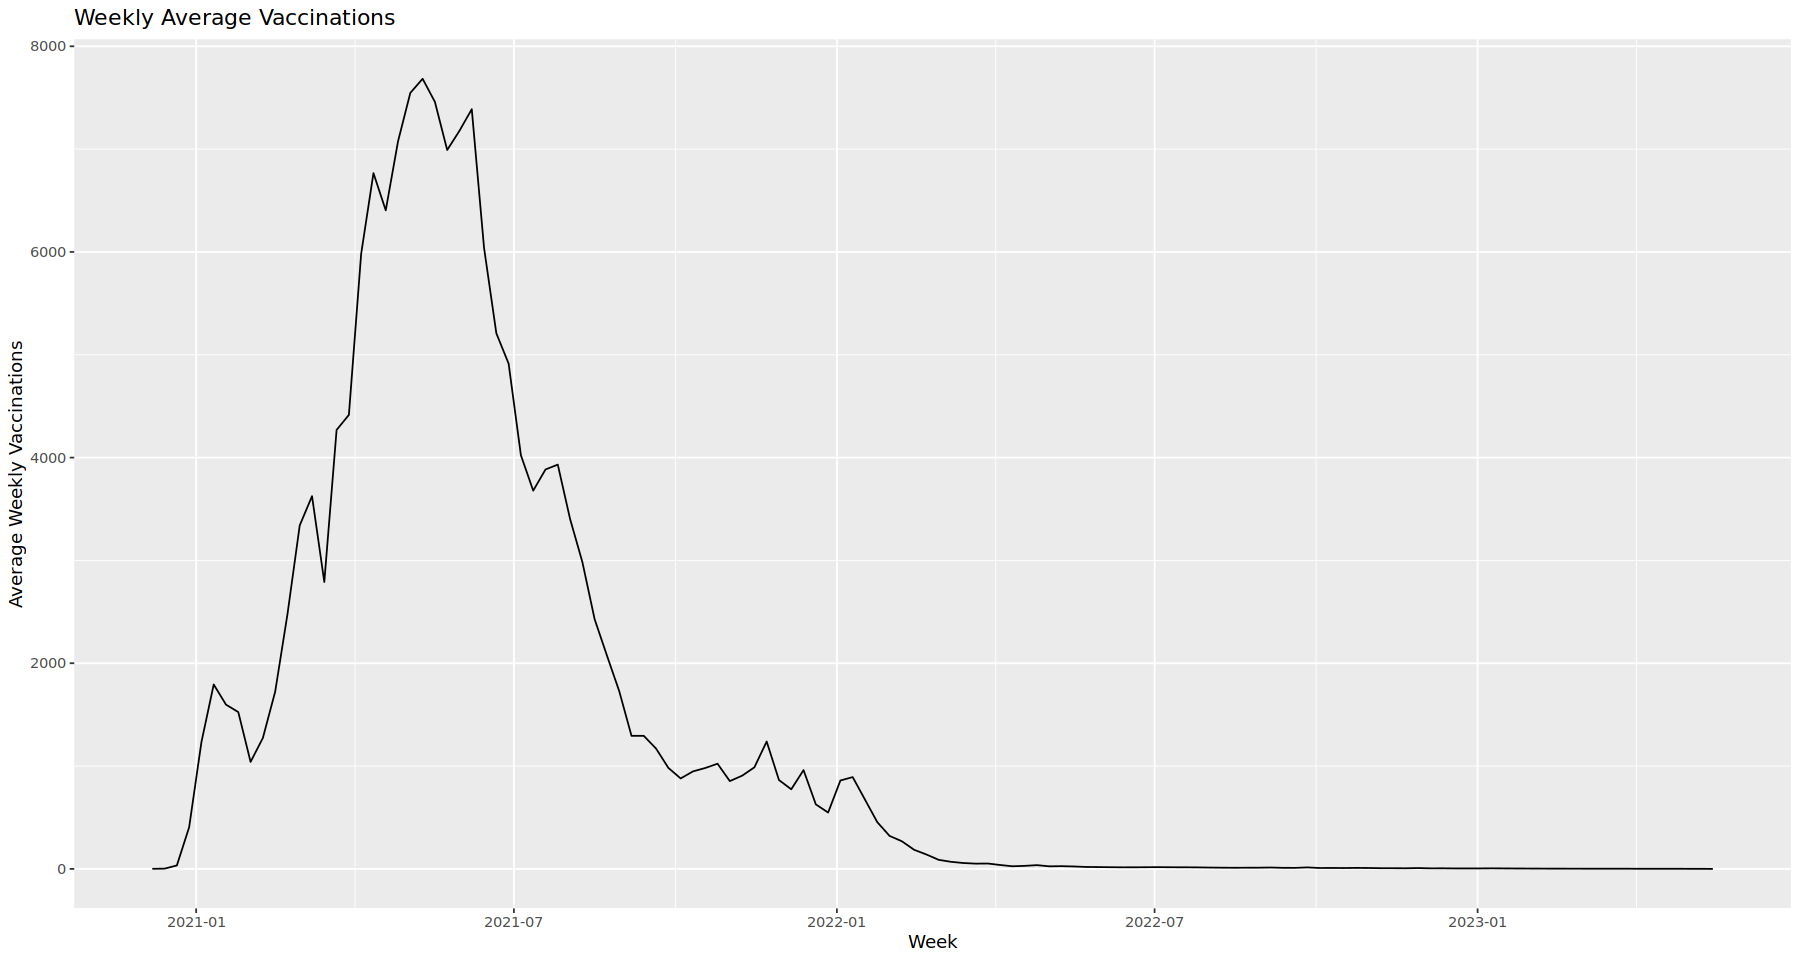

In [25]:
ggplot(cov_weekly, aes(x = Date, y = weekly_avg)) +
  geom_line() +
  labs(title = "Weekly Average Vaccinations", 
       x = "Week", 
       y = "Average Weekly Vaccinations") 

From the OWID data base only in EU region:

In [26]:
# Taking only europe region based on column continent : Europe
OWID_EU <- covid_data %>%
  filter(continent == "Europe")

In [27]:
head(OWID_EU,1)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,⋯,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,ALB,Europe,Albania,2020-02-25,NA,NA,NA,NA,NA,NA,⋯,51.2,NA,2.89,78.57,0.795,2842318,NA,NA,NA,NA


Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Transformation introduced infinite values in continuous y-axis”


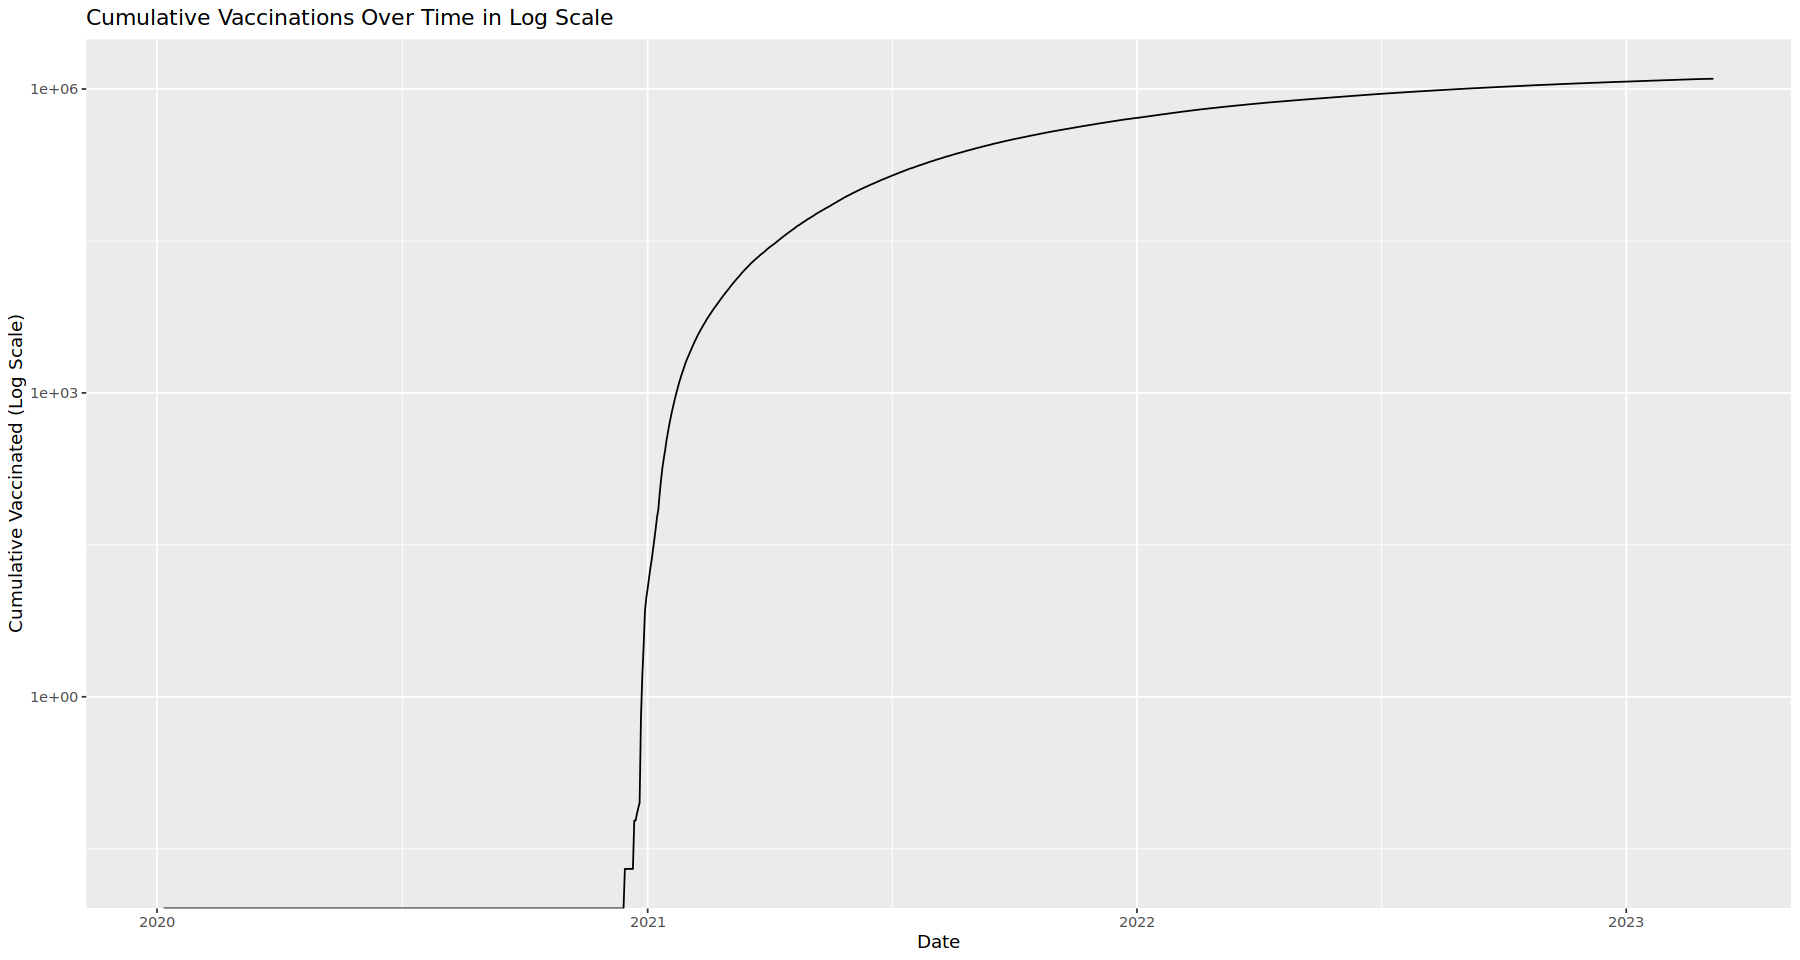

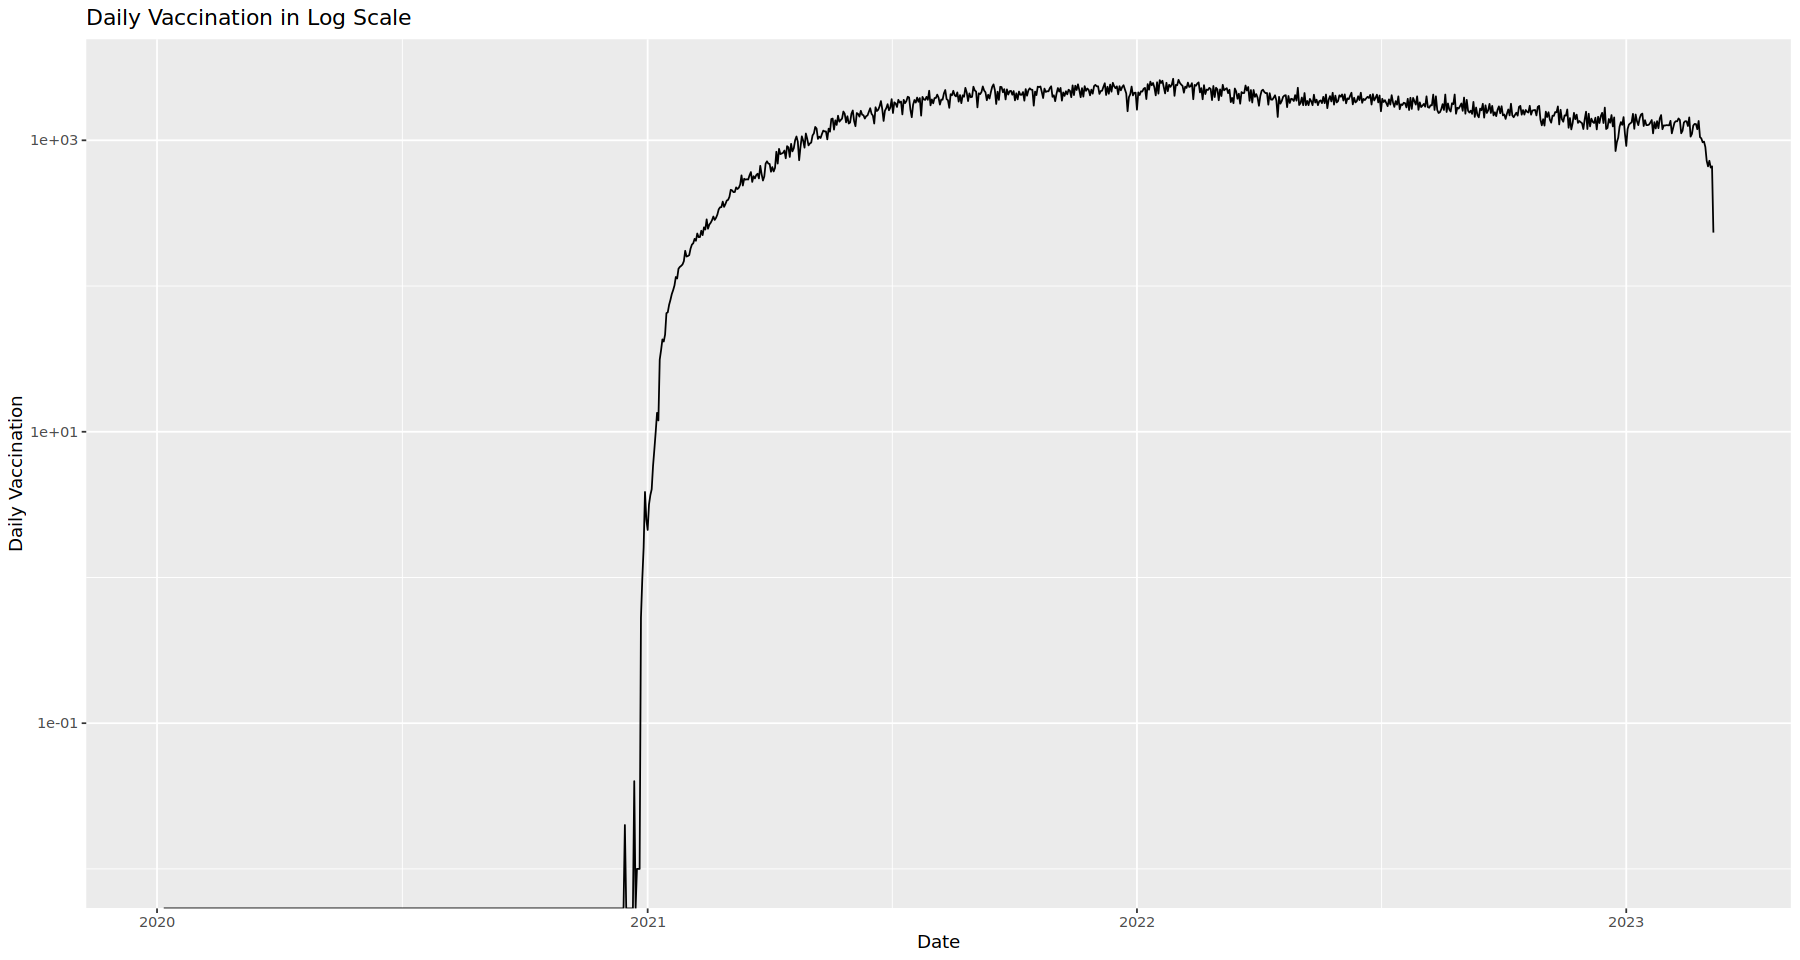

In [28]:
# create a new data frame wor total vaccinations per day and cummulative daily
OWID_EU_day <- OWID_EU %>%
  group_by(date) %>%
  summarise(total_vaccinated = sum(people_vaccinated_per_hundred, na.rm = TRUE)) %>%
  mutate(cumulative_vaccinated = cumsum(total_vaccinated))

OWID_EU_day$date <- as.Date(OWID_EU_day$date)

ggplot(OWID_EU_day, aes(x = date, y = cumulative_vaccinated)) +
  geom_line() +
  scale_y_log10() +
  labs(x = "Date", 
       y = "Cumulative Vaccinated (Log Scale)", 
       title = "Cumulative Vaccinations Over Time in Log Scale")

ggplot(OWID_EU_day, aes(x = date, y = total_vaccinated)) +
  geom_line() +
  scale_y_log10() +
  labs(x = "Date", 
       y = "Daily Vaccination", 
       title = "Daily Vaccination in Log Scale")

#### References

[1] https://www.ema.europa.eu/en/documents/overview/covid-19-vaccine-janssen-epar-medicine-overview_en.pdf

[2] https://www.ema.europa.eu/en/documents/overview/spikevax-previously-covid-19-vaccine-moderna-epar-medicine-overview_en.pdf

[3] https://www.ema.europa.eu/en/documents/overview/covid-19-vaccine-astrazeneca-epar-medicine-overview_en.pdf

[4] https://www.ema.europa.eu/en/documents/overview/jcovden-previously-covid-19-vaccine-janssen-epar-medicine-overview_en.pdf

[5] https://www.ema.europa.eu/en/documents/overview/comirnaty-epar-medicine-overview_en.pdf

[6] https://ourworldindata.org/covid-vaccinations

[7] https://github.com/owid/covid-19-data/tree/master/public/data

[8]https://www.ecdc.europa.eu/en/publications-data/data-covid-19-vaccination-eu-eea